In [99]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import math
import sklearn.metrics 
from sklearn.metrics import accuracy_score
from math import sqrt
from math import pi
from math import exp
import random
from imblearn.over_sampling import SMOTE
from scipy.stats import norm
from sklearn.metrics import *

In [2]:
#Uploading the Files
from google.colab import files
uploaded = files.upload()

Saving csv_result-1year.csv to csv_result-1year (1).csv
Saving csv_result-2year.csv to csv_result-2year (1).csv
Saving csv_result-3year.csv to csv_result-3year (1).csv
Saving csv_result-4year.csv to csv_result-4year (1).csv
Saving csv_result-5year.csv to csv_result-5year (1).csv


In [3]:
#Reading the Dataset

df_year_1=pd.read_csv('csv_result-1year.csv')
df_year_2=pd.read_csv('csv_result-2year.csv')
df_year_3=pd.read_csv('csv_result-3year.csv')
df_year_4=pd.read_csv('csv_result-4year.csv')
df_year_5=pd.read_csv('csv_result-5year.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,6,7,9,10,11,14,18,22,24,25,29,35,36,38,48,51,55,57,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,6,7,8,10,11,14,15,16,17,18,22,24,25,26,29,34,35,36,38,48,50,51,57,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#Setting the column Names
Renamed_Columns = ['id','net profit / total assets','total liabilities / total assets','working capital / total assets','current assets / short-term liabilities','[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',' retained earnings / total assets','EBIT / total assets','book value of equity / total liabilities','sales / total assets','equity / total assets','(gross profit + extraordinary items + financial expenses) / total assets','gross profit / short-term liabilities','(gross profit + depreciation) / sales','(gross profit + interest) / total assets','(total liabilities * 365) / (gross profit + depreciation)','(gross profit + depreciation) / total liabilities','total assets / total liabilities','gross profit / total assets','gross profit / sales','(inventory * 365) / sales','sales (n) / sales (n-1)','profit on operating activities / total assets','net profit / sales','gross profit (in 3 years) / total assets','(equity - share capital) / total assets','(net profit + depreciation) / total liabilities','profit on operating activities / financial expenses','working capital / fixed assets','logarithm of total assets','(total liabilities - cash) / sales','(gross profit + interest) / sales','(current liabilities * 365) / cost of products sold','operating expenses / short-term liabilities','operating expenses / total liabilities','profit on sales / total assets','total sales / total assets','(current assets - inventories) / long-term liabilities','constant capital / total assets','profit on sales / sales','(current assets - inventory - receivables) / short-term liabilities','total liabilities / ((profit on operating activities + depreciation) * (12/365))','profit on operating activities / sales','rotation receivables + inventory turnover in days','(receivables * 365) / sales','net profit / inventory','(current assets - inventory) / short-term liabilities','(inventory * 365) / cost of products sold','EBITDA (profit on operating activities - depreciation) / total assets','EBITDA (profit on operating activities - depreciation) / sales','current assets / total liabilities','short-term liabilities / total assets','(short-term liabilities * 365) / cost of products sold)','equity / fixed assets','constant capital / fixed assets','working capital','(sales - cost of products sold) / sales','(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)','total costs /total sales','long-term liabilities / equity','sales / inventory','sales / receivables','(short-term liabilities *365) / sales','sales / short-term liabilities','sales / fixed assets','target']

In [5]:
#Renaming the Column Names for Clarity

df_year_1.columns=Renamed_Columns
df_year_2.columns=Renamed_Columns
df_year_3.columns=Renamed_Columns
df_year_4.columns=Renamed_Columns
df_year_5.columns=Renamed_Columns

In [6]:
#Merging or Joining the 5 Data Files as Single File (5 Years of Data's)
Final_df = pd.concat([df_year_1,df_year_2,df_year_3,df_year_4,df_year_5])
Final_df=Final_df.reset_index(drop=True)
Final_df=Final_df.drop(columns=['id'],axis=1)

Imputing the Missing Values

In [8]:

for coln in Final_df.columns:
  if coln!='target':
    Final_df.loc[Final_df[coln] == '?', coln] = None

In [ ]:
#Checking the number of missing values

for i in Final_df.columns:
  if i!='target':
    print(i,Final_df[i].isnull().sum())

In [10]:

obj_coln=list(Final_df.select_dtypes(['object']).columns)

In [11]:
for coln in obj_coln:
  Final_df[coln]=Final_df[coln].astype(float, errors = 'raise')

In [12]:
# Calculating mean for the respective columns to impute the missing values

for coln in Final_df.columns:
  if Final_df[coln].isnull().sum() > 0:
    Final_df[coln]=Final_df[coln].fillna(Final_df[coln].mean())

In [ ]:
# Checking the number of missing Values if any after imputing 

for i in Final_df.columns:
  if i!='target':
    print(i,Final_df[i].isnull().sum())

**Removing Outliers**

In [14]:
#Checking the count of outliers
out_liers=[]
for coln in Renamed_Columns:
  if (coln!=' target ') & (coln!='id'): 
    mean = Final_df[coln].mean()
    std = Final_df[coln].std()
    out_liers.append([coln,Final_df.loc[(Final_df[coln] - mean).abs() > 2*std].count()])

In [ ]:
out_liers

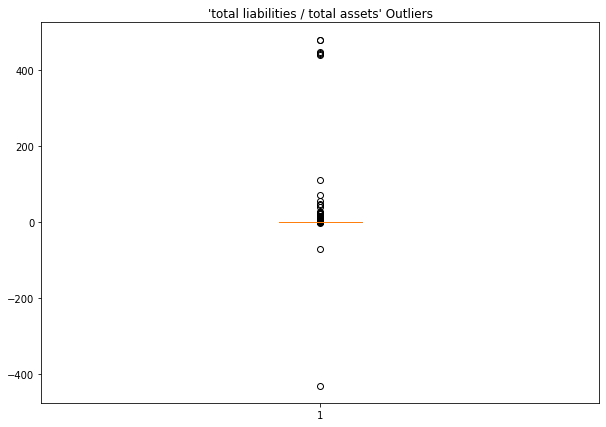

In [16]:
#Plotting the ouliers using boxplot

fig = plt.figure(figsize =(10, 7))
plt.boxplot(Final_df['total liabilities / total assets'])
plt.title("'total liabilities / total assets' Outliers")
plt.show()

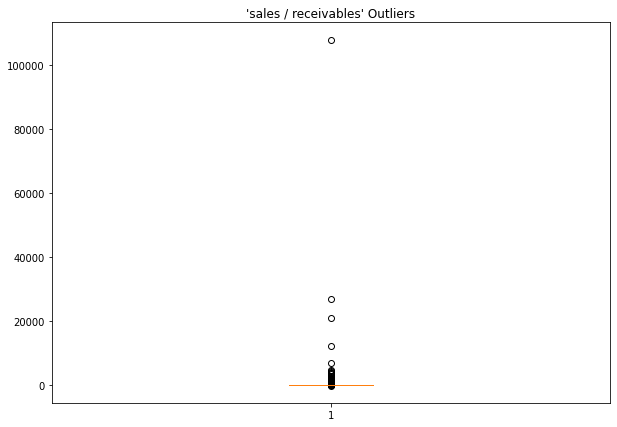

In [17]:
#Plotting the ouliers using boxplot

fig = plt.figure(figsize =(10, 7))
plt.boxplot(Final_df['sales / receivables'])
plt.title("'sales / receivables' Outliers")
plt.show()

In [18]:
for coln in Final_df.columns:
  if coln!='target': 
    mean = Final_df[coln].mean()
    std = Final_df[coln].std()
    Final_df.loc[(Final_df[coln] - mean).abs() > 2*std, coln] = mean

In [19]:
Final_df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,target
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [ ]:
Final_df.columns

Index(['net profit / total assets', 'total liabilities / total assets',
       'working capital / total assets',
       'current assets / short-term liabilities',
       '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
       ' retained earnings / total assets', 'EBIT / total assets',
       'book value of equity / total liabilities', 'sales / total assets',
       'equity / total assets',
       '(gross profit + extraordinary items + financial expenses) / total assets',
       'gross profit / short-term liabilities',
       '(gross profit + depreciation) / sales',
       '(gross profit + interest) / total assets',
       '(total liabilities * 365) / (gross profit + depreciation)',
       '(gross profit + depreciation) / total liabilities',
       'total assets / total liabilities', 'gross profit / total assets',
       'gross profit / sales', '(inventory * 365) / sales',
       'sales (n) / sales (n-1)',
       'pro

**Exploratory Data Analysis (EDA) **

Text(0.5, 1.0, 'Scatter Plopt for (net profit + depreciation) / total liabilities Vs operating expenses / total liabilities')

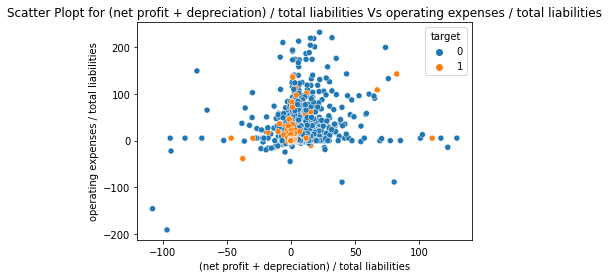

In [18]:
#Scatter Plot to show how the data is scattered
sns.scatterplot(data= Final_df, x='(net profit + depreciation) / total liabilities', y='operating expenses / total liabilities', hue = 'target')
plt.title("Scatter Plopt for (net profit + depreciation) / total liabilities Vs operating expenses / total liabilities")

Text(0.5, 1.0, 'Scatter Plopt for (net profit + depreciation) / total liabilities Vs operating expenses / total liabilities')

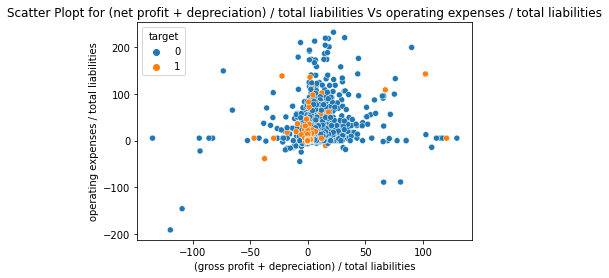

In [19]:
sns.scatterplot(data= Final_df, x='(gross profit + depreciation) / total liabilities', y='operating expenses / total liabilities', hue = 'target')
plt.title("Scatter Plopt for (net profit + depreciation) / total liabilities Vs operating expenses / total liabilities")

Text(0.5, 1.0, 'Scatter Plopt for EBITDA (profit on operating activities - depreciation) / total assets Vs sales / total assets')

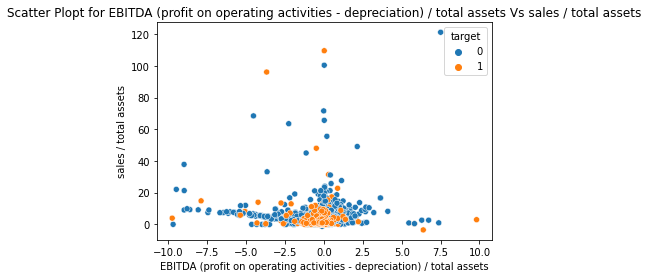

In [20]:
sns.scatterplot(data= Final_df, x= 'EBITDA (profit on operating activities - depreciation) / total assets', y='sales / total assets', hue = 'target')
plt.title("Scatter Plopt for EBITDA (profit on operating activities - depreciation) / total assets Vs sales / total assets")

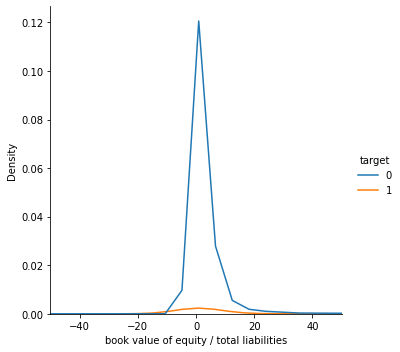

In [21]:
sns.displot(Final_df, x='book value of equity / total liabilities', kind='kde', hue='target')
plt.xlim(-50,50)
plt.show()

Text(0.5, 1.0, 'Scatter Plopt for gross profit / short-term liabilities Vs operating expenses / short-term liabilities')

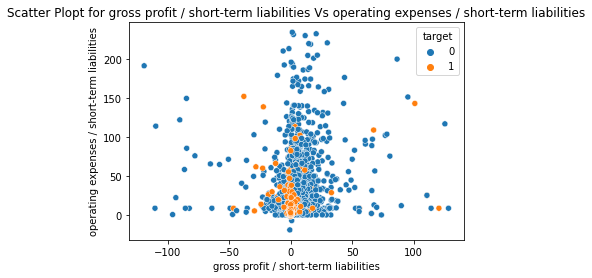

In [22]:
sns.scatterplot(data= Final_df, x= 'gross profit / short-term liabilities', y='operating expenses / short-term liabilities', hue = 'target')
plt.title("Scatter Plopt for gross profit / short-term liabilities Vs operating expenses / short-term liabilities")

In [56]:
#Partioning the Dataset as
X_df=Final_df.drop(columns=['target'],axis=1)
y_df=Final_df['target']

**Dimension Reduction**

In [57]:
# Finding correlatioon acroos all formats to do dimension reduction
X_df.corr()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
net profit / total assets,1.000000,-0.350874,0.342286,0.028306,0.022181,0.291430,0.784935,0.031062,0.029438,0.302970,...,0.102185,0.010366,0.166451,-0.040068,-0.004428,0.015370,0.010546,-0.044103,0.200851,0.019792
total liabilities / total assets,-0.350874,1.000000,-0.773710,-0.134466,-0.047604,-0.550924,-0.331109,-0.151820,0.123091,-0.716131,...,-0.211798,-0.010273,0.014850,0.016165,0.020818,0.002902,0.033080,0.054618,-0.260542,0.051688
working capital / total assets,0.342286,-0.773710,1.000000,0.188905,0.066277,0.414301,0.306603,0.125840,-0.064310,0.567700,...,0.252067,0.006164,0.012359,-0.012213,-0.017794,-0.000660,-0.080183,-0.068328,0.291123,0.053670
current assets / short-term liabilities,0.028306,-0.134466,0.188905,1.000000,0.021578,-0.003672,0.022327,0.551988,-0.038799,0.100274,...,0.044041,-0.003682,-0.018397,0.008701,-0.041831,0.019020,0.005195,-0.002309,0.356834,0.006367
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,0.022181,-0.047604,0.066277,0.021578,1.000000,0.021703,0.017723,0.053171,0.009335,0.063376,...,0.036536,0.001508,-0.000339,-0.005654,0.005174,0.002306,-0.010408,-0.036376,0.032258,0.012831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sales / inventory,0.015370,0.002902,-0.000660,0.019020,0.002306,-0.025174,0.015751,0.019907,0.032547,-0.006136,...,-0.010562,-0.000342,0.006520,0.003511,-0.003058,1.000000,0.013542,0.005498,0.044563,0.018144
sales / receivables,0.010546,0.033080,-0.080183,0.005195,-0.010408,-0.058250,-0.008337,0.012024,0.157406,-0.043569,...,-0.043074,0.004515,0.013504,-0.006170,-0.004426,0.013542,1.000000,-0.011573,0.135612,0.003073
(short-term liabilities *365) / sales,-0.044103,0.054618,-0.068328,-0.002309,-0.036376,-0.047642,-0.035963,0.002869,-0.032680,-0.067377,...,-0.024392,-0.405058,-0.007983,0.204094,-0.004870,0.005498,-0.011573,1.000000,-0.031991,-0.004216
sales / short-term liabilities,0.200851,-0.260542,0.291123,0.356834,0.032258,0.064141,0.165781,0.289861,0.171273,0.195234,...,0.050684,0.008148,0.025129,-0.010597,-0.024114,0.044563,0.135612,-0.031991,1.000000,0.030040


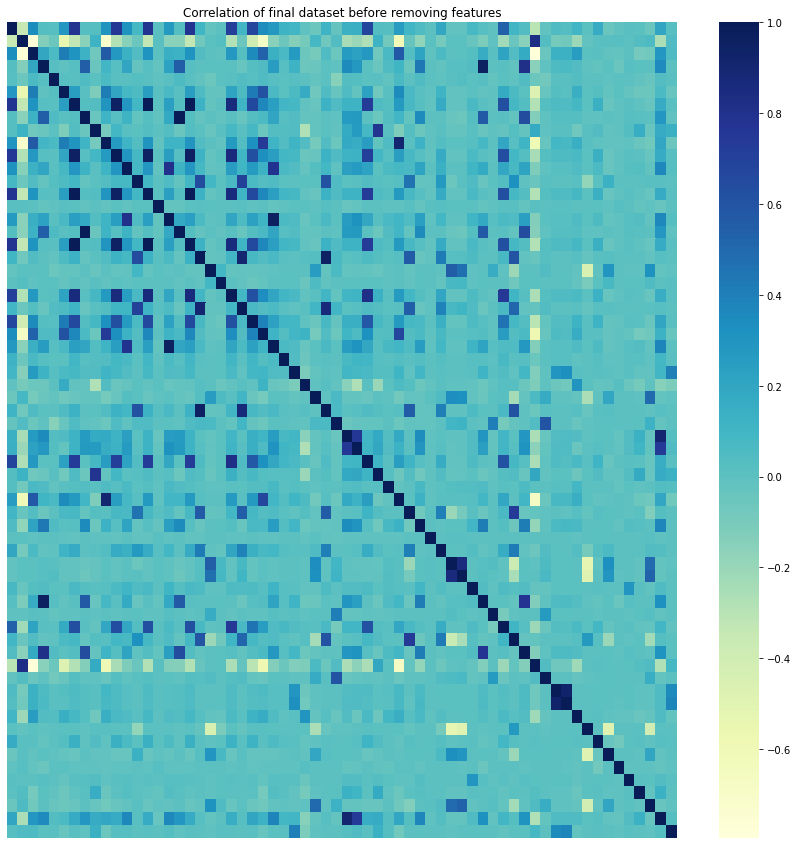

In [58]:
#Plotting the heatmap to show correlation

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(X_df.corr(), cmap="YlGnBu", annot=False, xticklabels=False, yticklabels=False)
ax.set_title('Correlation of final dataset before removing features')
plt.show()

In [59]:
#Creating a matrix and storing the absolute value of the argumnents

cor_matrix = X_df.corr().abs()
cor_matrix

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
net profit / total assets,1.000000,0.350874,0.342286,0.028306,0.022181,0.291430,0.784935,0.031062,0.029438,0.302970,...,0.102185,0.010366,0.166451,0.040068,0.004428,0.015370,0.010546,0.044103,0.200851,0.019792
total liabilities / total assets,0.350874,1.000000,0.773710,0.134466,0.047604,0.550924,0.331109,0.151820,0.123091,0.716131,...,0.211798,0.010273,0.014850,0.016165,0.020818,0.002902,0.033080,0.054618,0.260542,0.051688
working capital / total assets,0.342286,0.773710,1.000000,0.188905,0.066277,0.414301,0.306603,0.125840,0.064310,0.567700,...,0.252067,0.006164,0.012359,0.012213,0.017794,0.000660,0.080183,0.068328,0.291123,0.053670
current assets / short-term liabilities,0.028306,0.134466,0.188905,1.000000,0.021578,0.003672,0.022327,0.551988,0.038799,0.100274,...,0.044041,0.003682,0.018397,0.008701,0.041831,0.019020,0.005195,0.002309,0.356834,0.006367
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,0.022181,0.047604,0.066277,0.021578,1.000000,0.021703,0.017723,0.053171,0.009335,0.063376,...,0.036536,0.001508,0.000339,0.005654,0.005174,0.002306,0.010408,0.036376,0.032258,0.012831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sales / inventory,0.015370,0.002902,0.000660,0.019020,0.002306,0.025174,0.015751,0.019907,0.032547,0.006136,...,0.010562,0.000342,0.006520,0.003511,0.003058,1.000000,0.013542,0.005498,0.044563,0.018144
sales / receivables,0.010546,0.033080,0.080183,0.005195,0.010408,0.058250,0.008337,0.012024,0.157406,0.043569,...,0.043074,0.004515,0.013504,0.006170,0.004426,0.013542,1.000000,0.011573,0.135612,0.003073
(short-term liabilities *365) / sales,0.044103,0.054618,0.068328,0.002309,0.036376,0.047642,0.035963,0.002869,0.032680,0.067377,...,0.024392,0.405058,0.007983,0.204094,0.004870,0.005498,0.011573,1.000000,0.031991,0.004216
sales / short-term liabilities,0.200851,0.260542,0.291123,0.356834,0.032258,0.064141,0.165781,0.289861,0.171273,0.195234,...,0.050684,0.008148,0.025129,0.010597,0.024114,0.044563,0.135612,0.031991,1.000000,0.030040


In [60]:
# Creating the correlation matrix with upper triangle columns
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [61]:
#Removing the columns in the upper triangle which has correaltion above 80%

to_remove = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
len(to_remove)

17

In [62]:
#Dropping the columns which is not necessary (Dimension Reduction)
X_df=X_df.drop(columns=to_remove,axis=1)

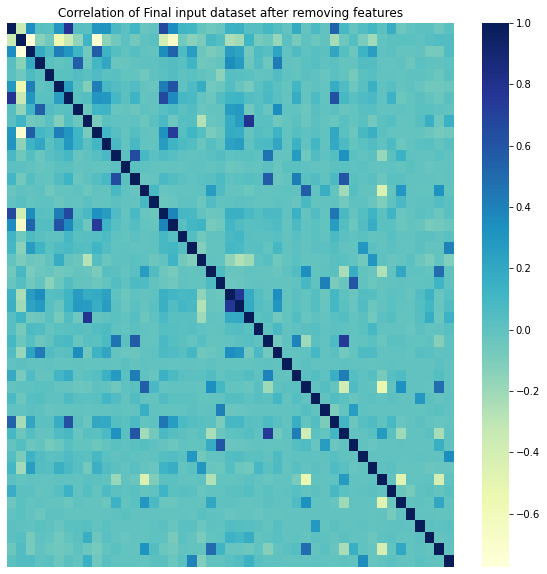

In [63]:
#Plotting Heatmap after removing higher correalted columns 

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X_df.corr(), cmap="YlGnBu", annot=False, xticklabels=False, yticklabels=False)
ax.set_title('Correlation of Final input dataset after removing features')
plt.show()

In [64]:
X_df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,equity / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / fixed assets
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,2.2437,7672.187571,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,7.4277
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,17.8660,2304.600000,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,60.9870
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,1.2098,6332.700000,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,5.2078
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,2.4524,20545.000000,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,5.5497
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,1.8839,3186.600000,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,7.8980


In [ ]:
X_df.describe()

**PCA - Principal Component Analysis**

In [20]:
# Spliting the dataset
X, y = Final_df.iloc[:, :-1], Final_df.iloc[:, -1]

In [24]:
# Function to Standardizing the data
def Standardize(data):
  scaler = StandardScaler()
  scaler.fit(data)
  X_pca = scaler.transform(data)
  return X_pca

In [25]:
# Standardizing the data
Standardize(Final_df)

array([[ 0.62317451, -0.3170575 ,  0.4930862 , ..., -0.28982485,
        -0.11979482, -0.22497196],
       [ 0.66103651, -0.04955209,  0.67206802, ..., -0.37458868,
         0.26443374, -0.22497196],
       [ 0.83572306,  0.38611927,  0.18798638, ..., -0.43145671,
        -0.13572014, -0.22497196],
       ...,
       [-1.05388701,  1.62926273, -1.09377272, ..., -0.51178125,
        -0.10168074,  4.44499837],
       [-0.74378968,  0.49283697, -0.40597888, ..., -0.29188595,
        -0.16622388,  4.44499837],
       [-0.72837096,  0.03136402, -0.55000214, ..., -0.43573746,
        -0.1530458 ,  4.44499837]])

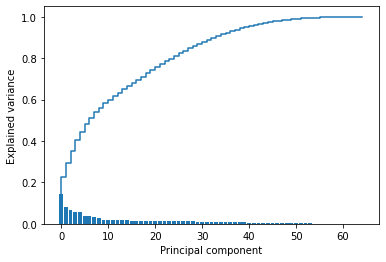

In [32]:
#Getting correct number of component/attributes to run the model in effective way

from numpy.linalg import eigh

cova_matrix = np.cov(Standardize(Final_df), rowvar=False)

eignvalues, egnvectors = eigh(cova_matrix)

total_eignvalues = sum(eignvalues)
indiv_var_exp = [(i/total_eignvalues) for i in sorted(eignvalues, reverse=True)]

cumu_exp_var = np.cumsum(indiv_var_exp)

plt.bar(range(0,len(indiv_var_exp)), indiv_var_exp, label='Individual Explained Variance')
plt.step(range(0,len(cumu_exp_var)), cumu_exp_var, label='Cumulative Explained Variance')
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.show()

In [46]:
Final_df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,target
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [75]:
#DataSet based on PCA
df1 = Final_df.iloc[:, 0:25]
df2 = Final_df.iloc[:,[64]]
PCA_df = pd.concat([df1, df2], axis=1)

In [79]:
PCA_df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,target
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,2.6349,0.249760,0.149420,43.370,1.247900,0.21402,0.119980,0.477060,0.50494,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2.0005,0.258340,0.152000,87.981,1.429300,0.24806,0.123040,0.270012,0.39542,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,1.4369,0.309060,0.236100,73.133,1.428300,0.30260,0.189960,0.270012,0.28932,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,3.2537,0.092704,0.071428,79.788,1.506900,0.11550,0.062782,0.171930,0.57353,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,1.6307,0.187320,0.115530,57.045,3.884997,0.19832,0.115530,0.187320,0.38677,0


In [84]:
#Splitting the data
X_PCA_df=PCA_df.drop(columns=['target'],axis=1)
y_PCA_df=PCA_df['target']

**Creating Model - Logistic Regression -  Without SMOTE**

***Logistic Regression with Correlation based dimension Reduction***

In [90]:
class logistic_Regression:
  

  def __init__(self, X, y, learningRate, tolerance, lamda, maxIteration):
    self.X=X
    self.y=y
    self.learningRate = learningRate
    self.tolerance = tolerance
    self.lamda = lamda
    self.maxIteration = maxIteration
 
  
  def add_X0(self, X):
    return np.column_stack([np.ones([X.shape[0],1]), X])

  #Function to create sigmoidal function
  def sigmoid(self,z):
    sig = 1 / (1 + math.e**(-z))
    return sig

  #Function to create Cost Function
  def costFunction(self, X, y):
    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
    cost = pred_.sum()
    return cost

  #Function to create Gradient Descent
  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))
    grad = (sig - y).dot(X)
    return grad

  
  def gradientDescent(self, X, y):
    errors = []
    last = float('inf')

    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * (self.gradient(X, y) + (self.lamda * self.w))
      curr = self.costFunction(X, y)

      diff = last - curr
      last = curr
  
      errors.append(curr)
      if abs(diff) < self.tolerance:
        print('Model stopped')
        break

  #Function to predict the model
  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.around(sig)


  #Function to Evaluate the model by calculating precision, recall, f1score
  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = (y & y_hat).sum() / y_hat.sum()

    recall = (y & y_hat).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision


  #Creating a Function to run the model
  def run_model(self):
     self.X_train = self.X
     self.y_train = self.y
     self.X_train = self.add_X0(self.X_train)
     self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
     self.gradientDescent(self.X_train, self.y_train)
     
     print(self.w)
     y_hat_train = self.predict(self.X_train)
     f1score, recall, precision = self.evaluate(self.y_train, y_hat_train)

     print("Accuracy:", accuracy_score(self.y_train, y_hat_train))
     print("F1 score:", f1score)
     print("Precision:", precision)
     print("Recall:", recall)





In [66]:
#Partioning the Data

train_X = X_df.values
train_y = y_df.values
lr = logistic_Regression(train_X, train_y, learningRate=0.01,tolerance=0.00000005,lamda=0.001,maxIteration=3000)

In [67]:
#Runnning the model and checking the outputs
lr.run_model()

  0%|          | 0/3000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in power
100%|██████████| 3000/3000 [00:36<00:00, 81.83it/s]


[-1.34927980e+05 -3.74673485e+03 -8.86429072e+04  6.00270102e+03
 -1.43104432e+05  6.73002977e+03 -3.25750085e+03 -4.75841938e+03
 -1.13305503e+05 -1.75439057e+05 -4.09568583e+04 -3.47169805e+04
 -1.26265413e+04 -2.05536809e+05 -3.55880039e+03 -4.55894638e+06
 -1.66955936e+05 -1.51298383e+04 -3.57519972e+04  8.05861245e+03
  6.08246953e+04 -6.06557024e+05  2.26223576e+04 -1.85363957e+06
 -5.96059167e+05 -1.26347909e+05 -2.24748114e+05 -5.97470739e+06
 -1.07237939e+04 -5.18900579e+04 -1.21571887e+05 -6.25158383e+03
 -1.94741704e+06  1.33089494e+05 -4.12197139e+06  1.36147984e+02
 -3.02359864e+03 -2.81993634e+04  5.86836787e+04 -3.80636169e+05
 -2.30416233e+05 -1.54208046e+04 -1.46089643e+05 -8.45922473e+04
 -9.42517331e+05 -1.51455227e+06 -2.46938531e+04 -5.64487685e+05]
Accuracy: 0.8857965672157585
F1 score: 0.13445084686572378
Precision: 0.10588558855885588
Recall: 0.1841224294595887


***Logistic Regression with PCA based dimension Reduction***

In [93]:
#Splitting the Data

train_X = X_PCA_df.values
train_y = y_PCA_df.values
lr = logistic_Regression(train_X, train_y, learningRate=0.01,tolerance=0.0000005,lamda=0.001,maxIteration=5000)

In [94]:
#Runnning the model and checking the outputs
lr.run_model()

  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in power
100%|██████████| 5000/5000 [00:53<00:00, 93.37it/s]

[-3.80887158e+05  3.49037371e+03 -2.54881204e+05 -2.22347851e+04
 -5.53422680e+05  8.46550624e+03  2.92300284e+04  1.87215388e+03
 -2.57947163e+05 -7.02778768e+05 -1.11529934e+05 -6.50480150e+03
  8.08841101e+03  1.28883339e+04  1.87200108e+03 -6.56567473e+05
 -3.53654366e+04 -6.56201147e+05  1.87202491e+03  2.09476650e+04
 -1.11427780e+07 -5.39680358e+05 -7.73339221e+03  2.41105189e+04
 -2.36485215e+04 -6.04167719e+04]
Accuracy: 0.8639788042852206
F1 score: 0.17610940552609544
Precision: 0.12433497536945813
Recall: 0.3017694882831181


**Logistic Regression - With SMOTE**

***Logistic Regression with Correlation based dimension Reduction***

In [69]:
class logistic_Regression:
  

  def __init__(self, X, y, learningRate, tolerance, lamda, maxIteration):
    self.X=X
    self.y=y
    self.learningRate = learningRate
    self.tolerance = tolerance
    self.lamda = lamda
    self.maxIteration = maxIteration
 
  
  def add_X0(self, X):
    return np.column_stack([np.ones([X.shape[0],1]), X])

  #Function to create sigmoidal function
  def sigmoid(self,z):
    sig = 1 / (1 + math.e**(-z))
    return sig

  #Function to create Cost Function
  def costFunction(self, X, y):
    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
    cost = pred_.sum()
    return cost

  #Function to create Gradient Descent
  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))
    grad = (sig - y).dot(X)
    return grad

  
  def gradientDescent(self, X, y):
    errors = []
    last = float('inf')

    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * (self.gradient(X, y) + (self.lamda * self.w))
      curr = self.costFunction(X, y)

      diff = last - curr
      last = curr
  
      errors.append(curr)
      if abs(diff) < self.tolerance:
        print('Model stopped')
        break

  #Function to predict the model
  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.around(sig)


  #Function to Evaluate the model by calculating precision, recall, f1score
  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = (y & y_hat).sum() / y_hat.sum()

    recall = (y & y_hat).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision


  #Creating a Function to run the model
  def run_model(self):
     self.X_train = self.X
     self.y_train = self.y
     self.X_train = self.add_X0(self.X_train)
     # OverSampling the data (SMOTE)
     oversample = SMOTE(sampling_strategy=0.5, k_neighbors=2)
     self.X_train, self.y_train = oversample.fit_resample(self.X_train, self.y_train)
     self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
     self.gradientDescent(self.X_train, self.y_train)
     
     print(self.w)
     y_hat_train = self.predict(self.X_train)
     f1score, recall, precision = self.evaluate(self.y_train, y_hat_train)

     print("Accuracy:", accuracy_score(self.y_train, y_hat_train))
     print("F1 score:", f1score)
     print("Precision:", precision)
     print("Recall:", recall)





In [88]:
#Splitting the Data

train_X = X_df.values
train_y = y_df.values
lr = logistic_Regression(train_X, train_y, learningRate=0.01,tolerance=0.00000005,lamda=0.001,maxIteration=3000)

In [89]:
#Runnning the model and checking the outputs
lr.run_model()

  0%|          | 0/3000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in power
100%|██████████| 3000/3000 [01:09<00:00, 43.22it/s]

[-8.71011504e+04 -2.63801894e+04 -3.29616351e+04 -2.74063504e+03
  4.05193760e+05  2.17898532e+04 -3.42017013e+04 -2.79177251e+04
  5.29514056e+05 -7.71574129e+04 -4.88509422e+04 -1.22777143e+05
 -2.76241922e+04 -4.95954146e+05 -2.05467669e+04 -5.87862368e+05
  2.89206022e+04 -5.23799152e+04 -7.22801180e+04  4.67028932e+04
  1.91520293e+05 -3.99900575e+05  6.25981434e+04  1.52826053e+04
 -1.38435386e+05  2.56438593e+05 -6.59835433e+04 -2.83464275e+06
 -3.39031325e+04  8.28748295e+04 -3.68762368e+05 -1.88537881e+04
 -1.81349483e+04  4.56046825e+05 -2.88212928e+04 -1.14961831e+04
 -1.10420955e+04 -1.01008061e+05  1.68692524e+05 -5.19793911e+05
 -6.67154335e+05 -5.90838347e+04 -3.93810090e+05 -1.03097251e+04
  2.27960786e+03 -8.05475085e+05 -7.69113927e+03  1.52131028e+05]
Accuracy: 0.6916783656871762
F1 score: 0.4437068739627915
Precision: 0.5566106647187729
Recall: 0.3688822191024834


***Logistic Regression with PCA based dimension Reduction***

In [86]:
#Splitting the Data

train_X = X_PCA_df.values
train_y = y_PCA_df.values
lr = logistic_Regression(train_X, train_y, learningRate=0.01,tolerance=0.0000005,lamda=0.001,maxIteration=5000)

In [87]:
#Runnning the model and checking the outputs
lr.run_model()

  0%|          | 0/3000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in power
100%|██████████| 3000/3000 [01:03<00:00, 47.59it/s]


[-208841.62865602  -43614.66933283  -45715.44412865  -99193.95620473
  -57312.5147781    -6565.48056449  -55105.17768292  -46688.29309735
  142991.8903572  -298650.24565253 -158202.68800943  -44512.11719137
  -97989.96466998  -59723.19424972  -46693.73780745  449468.07695335
 -117279.04679891  -85866.17531787  -46689.59124208  -36199.02464744
 -770997.25806473 -143545.33064788  -42773.93671709  -29139.49617176
  -98996.18182158 -156764.101303  ]
Accuracy: 0.30530409385034935
F1 score: 0.3631414665897425
Precision: 0.26147160325508073
Recall: 0.5941811492472285


**Naive Bayes - Without SMOTE**


Naive Bayes with Correlation based dimension Reduction

In [110]:
#Calculating required field

mean = np.mean(X_df.values)
std = np.std(X_df.values)
X_norm = (X_df.values-mean) / std

In [111]:
class Naive_Bayes:
   
   #Function to Initiate the parameters
  def __init__(self, X, y) -> None:
    self.X = X
    self.y = y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
    
  #Function to fit the distribution
  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)
    dist = norm(mean, sigma)
    return dist

  #Function to Calculate the mean
  def x_mean(self,data):
    mean = np.mean(data)
    return mean
  
  #Function to Calculate the sigma
  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  #Function to Calculate the likelihood
  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[n])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[n])) * exponent
      lkhd = lkhd * c
    return lkhd
  
  #Function to Calculate the Probabiliity
  def probability(self, X, prior, mean, sigma):
    return prior * self.calculate_likelihood(X,mean,sigma)

  #Function to fit the model
  def fit(self):

    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)
    
    self.X0_mean = []
    self.X1_mean = []
    self.X0_sigma = []
    self.X1_sigma = []
    for i in range(self.X0_train.shape[1]):
       self.X0_mean.append(self.x_mean(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_mean.append(self.x_mean(self.X1_train[:,i]))
    for i in range(self.X0_train.shape[1]):
       self.X0_sigma.append(self.x_sigma(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_sigma.append(self.x_sigma(self.X1_train[:,i]))

  #Function to Evaluate the Model by showing f1score, recall, precision, accuracy
  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision

  
  #Function to Predict the model
  def predict(self):
    y_hat=[]
    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.probability(sample, self.prior_y0, self.X0_mean, self.X0_sigma)
      py1 = self.probability(sample, self.prior_y1, self.X1_mean, self.X1_sigma)

      y_hat.append(np.argmax([py0*100,py1*100]))

    #Printing the model evaluating Parameters
    print("Accuracy:", accuracy_score(self.y_test, y_hat))
    print("F1 score:", sklearn.metrics.f1_score(self.y_test, y_hat))
    print("Precision:", sklearn.metrics.precision_score(self.y_test, y_hat))
    print("Recall:", sklearn.metrics.recall_score(self.y_test, y_hat))


      

In [112]:
#Passing the datas in Naive Bayes Function 
nb = Naive_Bayes(X_norm, y_df.values)

#Fitting and Predicting the Model
nb.fit()
nb.predict()

Accuracy: 0.8959453232990324
F1 score: 0.10205434062292908
Precision: 0.08779931584948689
Recall: 0.12183544303797468


***Naive_Bayes with PCA based dimension Reduction***

In [117]:
#Calculating required field

mean = np.mean(X_PCA_df.values)
std = np.std(X_PCA_df.values)
X_norm = (X_PCA_df.values-mean) / std

In [118]:
#Function to create class for Naive Bayes Model


class Naive_Bayes:
   
   #Function to Initiate the parameters
  def __init__(self, X, y) -> None:
    self.X = X
    self.y = y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
    
  #Function to fit the distribution
  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)
    dist = norm(mean, sigma)
    return dist

  #Function to Calculate the mean
  def x_mean(self,data):
    mean = np.mean(data)
    return mean
  
  #Function to Calculate the sigma
  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  #Function to Calculate the likelihood
  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[n])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[n])) * exponent
      lkhd = lkhd * c
    return lkhd
  
  #Function to Calculate the Probabiliity
  def probability(self, X, prior, mean, sigma):
    return prior * self.calculate_likelihood(X,mean,sigma)

  #Function to fit the model
  def fit(self):

    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)
    
    self.X0_mean = []
    self.X1_mean = []
    self.X0_sigma = []
    self.X1_sigma = []
    for i in range(self.X0_train.shape[1]):
       self.X0_mean.append(self.x_mean(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_mean.append(self.x_mean(self.X1_train[:,i]))
    for i in range(self.X0_train.shape[1]):
       self.X0_sigma.append(self.x_sigma(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_sigma.append(self.x_sigma(self.X1_train[:,i]))

  #Function to Evaluate the Model by showing f1score, recall, precision, accuracy
  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision

  
  #Function to Predict the model
  def predict(self):
    y_hat=[]
    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.probability(sample, self.prior_y0, self.X0_mean, self.X0_sigma)
      py1 = self.probability(sample, self.prior_y1, self.X1_mean, self.X1_sigma)

      y_hat.append(np.argmax([py0*100,py1*100]))

    #Printing the model evaluating Parameters
    print("Accuracy:", accuracy_score(self.y_test, y_hat))
    print("F1 score:", sklearn.metrics.f1_score(self.y_test, y_hat))
    print("Precision:", sklearn.metrics.precision_score(self.y_test, y_hat))
    print("Recall:", sklearn.metrics.recall_score(self.y_test, y_hat))


      

In [119]:
#Passing the datas in Naive Bayes Function 
nb = Naive_Bayes(X_norm, y_PCA_df.values)

#Fitting and Predicting the Model
nb.fit()
nb.predict()

Accuracy: 0.9139149132237752
F1 score: 0.09669621273166804
Precision: 0.09852216748768473
Recall: 0.0949367088607595


Naive Bayes With SMOTE

***Naive Bayes with Correlation based dimension Reduction***

In [120]:
#Caluclating the required fields

mean = np.mean(X_df.values)
std = np.std(X_df.values)
X_norm = (X_df.values-mean) / std

In [121]:
#Function to create class for Naive Bayes Model


class Naive_Bayes:
   
   #Function to Initiate the parameters
  def __init__(self, X, y) -> None:
    self.X = X
    self.y = y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
    over = SMOTE(sampling_strategy=0.4)
    self.X_train, self.y_train = over.fit_resample(self.X_train, self.y_train)

    
  #Function to fit the distribution
  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)
    dist = norm(mean, sigma)
    return dist

  #Function to Calculate the mean
  def x_mean(self,data):
    mean = np.mean(data)
    return mean
  
  #Function to Calculate the sigma
  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  #Function to Calculate the likelihood
  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[n])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[n])) * exponent
      lkhd = lkhd * c
    return lkhd
  
  #Function to Calculate the Probabiliity
  def probability(self, X, prior, mean, sigma):
    return prior * self.calculate_likelihood(X,mean,sigma)

  #Function to fit the model
  def fit(self):

    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)
    
    self.X0_mean = []
    self.X1_mean = []
    self.X0_sigma = []
    self.X1_sigma = []
    for i in range(self.X0_train.shape[1]):
       self.X0_mean.append(self.x_mean(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_mean.append(self.x_mean(self.X1_train[:,i]))
    for i in range(self.X0_train.shape[1]):
       self.X0_sigma.append(self.x_sigma(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_sigma.append(self.x_sigma(self.X1_train[:,i]))

  #Function to Evaluate the Model by showing f1score, recall, precision, accuracy
  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision

  
  #Function to Predict the model
  def predict(self):
    y_hat=[]
    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.probability(sample, self.prior_y0, self.X0_mean, self.X0_sigma)
      py1 = self.probability(sample, self.prior_y1, self.X1_mean, self.X1_sigma)

      y_hat.append(np.argmax([py0*100,py1*100]))

    #Printing the model evaluating Parameters
    print("Accuracy:", accuracy_score(self.y_test, y_hat))
    print("F1 score:", sklearn.metrics.f1_score(self.y_test, y_hat))
    print("Precision:", sklearn.metrics.precision_score(self.y_test, y_hat))
    print("Recall:", sklearn.metrics.recall_score(self.y_test, y_hat))


      

In [122]:
#Passing the datas in Naive Bayes Function 
nb = Naive_Bayes(X_norm, y_df.values)

#Fitting and Predicting the Model
nb.fit()
nb.predict()

Accuracy: 0.17969589924742743
F1 score: 0.09765163034296334
Precision: 0.05157951097626272
Recall: 0.9145569620253164


***Naive Bayes with PCA based dimension Reduction***

In [123]:
#Caluclating the required fields

mean = np.mean(X_PCA_df.values)
std = np.std(X_PCA_df.values)
X_norm = (X_PCA_df.values-mean) / std

In [124]:
#Function to create class for Naive Bayes Model


class Naive_Bayes:
   
   #Function to Initiate the parameters
  def __init__(self, X, y) -> None:
    self.X = X
    self.y = y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
    over = SMOTE(sampling_strategy=0.4)
    self.X_train, self.y_train = over.fit_resample(self.X_train, self.y_train)

    
  #Function to fit the distribution
  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)
    dist = norm(mean, sigma)
    return dist

  #Function to Calculate the mean
  def x_mean(self,data):
    mean = np.mean(data)
    return mean
  
  #Function to Calculate the sigma
  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  #Function to Calculate the likelihood
  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[n])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[n])) * exponent
      lkhd = lkhd * c
    return lkhd
  
  #Function to Calculate the Probabiliity
  def probability(self, X, prior, mean, sigma):
    return prior * self.calculate_likelihood(X,mean,sigma)

  #Function to fit the model
  def fit(self):

    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)
    
    self.X0_mean = []
    self.X1_mean = []
    self.X0_sigma = []
    self.X1_sigma = []
    for i in range(self.X0_train.shape[1]):
       self.X0_mean.append(self.x_mean(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_mean.append(self.x_mean(self.X1_train[:,i]))
    for i in range(self.X0_train.shape[1]):
       self.X0_sigma.append(self.x_sigma(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_sigma.append(self.x_sigma(self.X1_train[:,i]))

  #Function to Evaluate the Model by showing f1score, recall, precision, accuracy
  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision

  
  #Function to Predict the model
  def predict(self):
    y_hat=[]
    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.probability(sample, self.prior_y0, self.X0_mean, self.X0_sigma)
      py1 = self.probability(sample, self.prior_y1, self.X1_mean, self.X1_sigma)

      y_hat.append(np.argmax([py0*100,py1*100]))

    #Printing the model evaluating Parameters
    print("Accuracy:", accuracy_score(self.y_test, y_hat))
    print("F1 score:", sklearn.metrics.f1_score(self.y_test, y_hat))
    print("Precision:", sklearn.metrics.precision_score(self.y_test, y_hat))
    print("Recall:", sklearn.metrics.recall_score(self.y_test, y_hat))


      

In [125]:
#Passing the datas in Naive Bayes Function 
nb = Naive_Bayes(X_norm, y_PCA_df.values)

#Fitting and Predicting the Model
nb.fit()
nb.predict()

Accuracy: 0.8947166333896482
F1 score: 0.12059012187299552
Precision: 0.10140237324703344
Recall: 0.14873417721518986


----------------------------------------------------------------------------


**Logistic Regression with SMOTE and Stratified K-Fold**



In [132]:
class logistic_regression_CV:
  

  def __init__(self, learningRate, tolerance, lamda, maxIteration):
    
    self.learningRate = learningRate
    self.tolerance = tolerance
    self.lamda = lamda
    self.maxIteration = maxIteration
 

  def add_X0(self, X):
    return np.column_stack([np.ones([X.shape[0],1]), X])


  def sigmoid(self,z):
    sig = 1 / (1 + math.e**(-z))
    return sig



  def costFunction(self, X, y):

    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
    cost = pred_.sum()
    return cost



  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))

    grad = (sig - y).dot(X)
    return grad



  def gradientDescent(self, X, y):
    errors = []
    last = float('inf')

    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * (self.gradient(X, y) + (self.lamda * self.w))
      curr = self.costFunction(X, y)

      diff = last - curr
      last = curr

      errors.append(curr)
      if diff < self.tolerance:
        print('Model stopped')
        break



    #self.plot_cost(errors)

  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.around(sig)



  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = (y & y_hat).sum() / y_hat.sum()

    recall = (y & y_hat).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision



  def run_model(self,X,y):
     self.X_train = X
     self.y_train = y
     self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
     self.gradientDescent(self.X_train, self.y_train)



***With Correlation Dimension Reduction Dataset***

  0%|          | 1/5000 [00:00<00:35, 139.44it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:15, 316.84it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:16, 309.77it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:24, 200.61it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:18, 275.51it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:15, 318.45it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:21, 230.74it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:21, 231.73it/s]

Model stopped



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power
  0%|          | 1/5000 [00:00<00:48, 103.21it/s]

Model stopped



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power
  0%|          | 1/5000 [00:00<00:21, 231.22it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


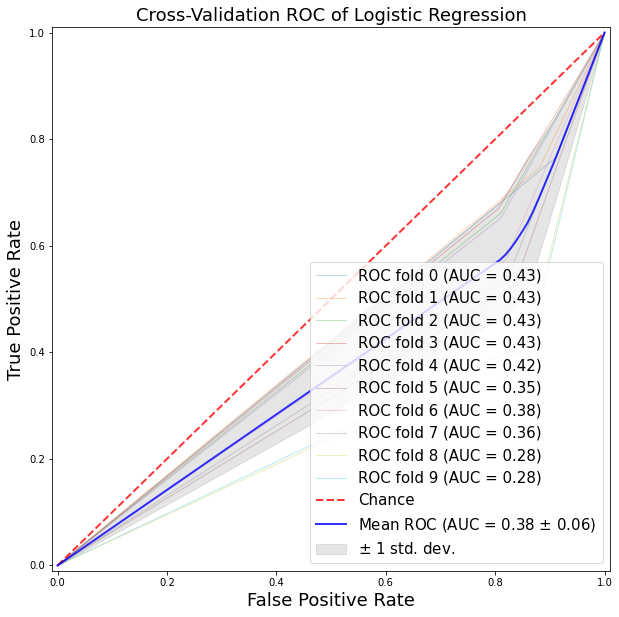

Average Accuracy: 0.17921861746905773
Average Precision: 0.03458607565406391
Average Recall: 0.5963385737069948
Average F1 score: 0.06537414671675794


In [133]:
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)


classifier = logistic_regression_CV(learningRate=0.01,tolerance=0.00005,lamda=0.5,maxIteration=5000)

tprs = []
aucs = []
accu=[]
prec=[]
recl=[]
f1sc=[]
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0

#Passing the dataset
for train_index, test_index  in cv.split(X_df.values, y_df.values):
    x_train_fold, x_test_fold = X_norm[train_index], X_norm[test_index]
    y_train_fold, y_test_fold = y_df.values[train_index], y_df.values[test_index]
    oversample = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.8)
    x_train_fold, y_train_fold = under.fit_resample(x_train_fold, y_train_fold)    
    classifier.run_model(x_train_fold, y_train_fold)
    c_pred= classifier.predict(x_test_fold)
    accu.append(accuracy_score(y_test_fold,c_pred))
    prec.append(sklearn.metrics.precision_score(y_test_fold,c_pred))
    recl.append(sklearn.metrics.recall_score(y_test_fold,c_pred))
    f1sc.append(sklearn.metrics.f1_score(y_test_fold,c_pred))
    
    
    
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test_fold, c_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Logistic Regression',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()
avg_acc=0
avg_prec=0
avg_recl=0
avg_f1sc=0
for i,m,n,a in zip(accu,prec,recl,f1sc):
  avg_acc+=i
  avg_prec+=m
  avg_recl+=n
  avg_f1sc+=a

#Printing the Parameters
print('Average Accuracy:',avg_acc/10)
print('Average Precision:',avg_prec/10)
print('Average Recall:',avg_recl/10)
print('Average F1 score:',avg_f1sc/10)

***With PCA Dimension Reduction DataSet***

  0%|          | 1/5000 [00:00<01:02, 80.26it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:42, 117.67it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:39, 126.36it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:43, 115.32it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:39, 128.04it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:42, 118.00it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<01:08, 72.67it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:58, 85.48it/s]


Model stopped


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power
  0%|          | 1/5000 [00:00<00:41, 121.57it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


Model stopped


  0%|          | 1/5000 [00:00<00:41, 120.55it/s]


Model stopped


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


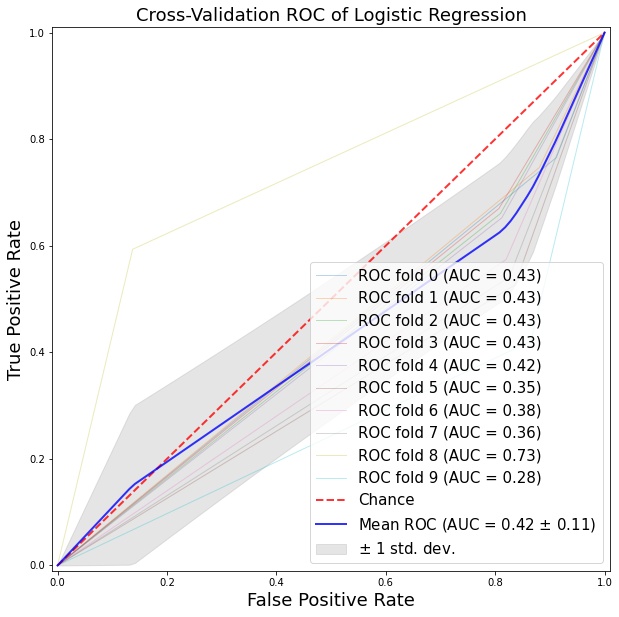

Average Accuracy: 0.24806659150719162
Average Precision: 0.050163417595273055
Average Recall: 0.6149988607883345
Average F1 score: 0.08845495935815299


In [134]:
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)


classifier = logistic_regression_CV(learningRate=0.01,tolerance=0.00005,lamda=0.5,maxIteration=5000)

tprs = []
aucs = []
accu=[]
prec=[]
recl=[]
f1sc=[]
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0

#Passing the dataset
for train_index, test_index  in cv.split(X_PCA_df.values, y_PCA_df.values):
    x_train_fold, x_test_fold = X_norm[train_index], X_norm[test_index]
    y_train_fold, y_test_fold = y_df.values[train_index], y_df.values[test_index]
    oversample = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.8)
    x_train_fold, y_train_fold = under.fit_resample(x_train_fold, y_train_fold)    
    classifier.run_model(x_train_fold, y_train_fold)
    c_pred= classifier.predict(x_test_fold)
    accu.append(accuracy_score(y_test_fold,c_pred))
    prec.append(sklearn.metrics.precision_score(y_test_fold,c_pred))
    recl.append(sklearn.metrics.recall_score(y_test_fold,c_pred))
    f1sc.append(sklearn.metrics.f1_score(y_test_fold,c_pred))
    
    
    
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test_fold, c_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Logistic Regression',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()
avg_acc=0
avg_prec=0
avg_recl=0
avg_f1sc=0
for i,m,n,a in zip(accu,prec,recl,f1sc):
  avg_acc+=i
  avg_prec+=m
  avg_recl+=n
  avg_f1sc+=a

#Printing the Parameters
print('Average Accuracy:',avg_acc/10)
print('Average Precision:',avg_prec/10)
print('Average Recall:',avg_recl/10)
print('Average F1 score:',avg_f1sc/10)

**Naive Bayes with SMOTE and Stratified K-Fold**

With Correaltion Dimension Reduction Dataset

In [135]:
#Caluclating the required fields

mean = np.mean(X_df.values)
std = np.std(X_df.values)
X_norm = (X_df.values-mean) / std

In [136]:
#Function to Create Naive Bayes
class Naive_Bayes_CV:


  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)

    dist = norm(mean, sigma)
    return dist

  def x_mean(self,data):
    mean = np.mean(data)
    return mean

  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[i])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[i])) * exponent
      lkhd = lkhd * c
    return lkhd
  

  def probability(self, X, prior, dist):
    curr = 1
    for i in range(len(dist)):
      curr = curr * dist[i].pdf(X[i])
    return prior * curr

  def fit(self,X,y):
    self.X_train = X
    self.y_train = y
    
    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)

    self.X0_dist = []
    self.X1_dist = []
    for i in range(self.X0_train.shape[1]):
       self.X0_dist.append(self.fit_distribution(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_dist.append(self.fit_distribution(self.X1_train[:,i]))

  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision


  def predict(self,X):
    self.X_test=X
    y_hat=[]
    for sample in self.X_test:
      py0 = self.probability(sample, self.prior_y0, self.X0_dist)
      py1 = self.probability(sample, self.prior_y1, self.X1_dist)
     

      y_hat.append(np.argmax([py0*100,py1*100]))
    return y_hat

      

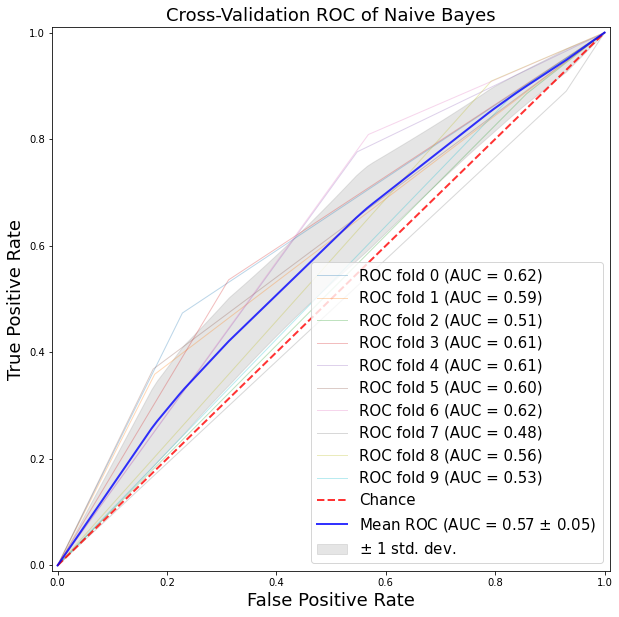

Average Accuracy: 0.46878148231894573
Average Precision: 0.06997991636515154
Average Recall: 0.6891023012075643
Average F1 score: 0.12265339073959795


In [137]:

cv = StratifiedKFold(n_splits=10)

classifier = Naive_Bayes_CV()

tprs = []
aucs = []
accu=[]
prec=[]
recl=[]
f1sc=[]
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0

#Passing the Dataset
for train_index, test_index  in cv.split(X_norm, y_df.values):
    x_train_fold, x_test_fold = X_norm[train_index], X_norm[test_index]
    y_train_fold, y_test_fold = y_df.values[train_index], y_df.values[test_index]
    oversample = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.8)
    x_train_fold, y_train_fold = oversample.fit_resample(x_train_fold, y_train_fold)    
    classifier.fit(x_train_fold, y_train_fold)
    c_pred= classifier.predict(x_test_fold)
    accu.append(accuracy_score(y_test_fold,c_pred))
    prec.append(sklearn.metrics.precision_score(y_test_fold,c_pred))
    recl.append(sklearn.metrics.recall_score(y_test_fold,c_pred))
    f1sc.append(sklearn.metrics.f1_score(y_test_fold,c_pred))
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test_fold, c_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Naive Bayes',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()
avg_acc=0
avg_prec=0
avg_recl=0
avg_f1sc=0
for i,m,n,a in zip(accu,prec,recl,f1sc):
  avg_acc+=i
  avg_prec+=m
  avg_recl+=n
  avg_f1sc+=a

#Printing the Evaluating Fields
print('Average Accuracy:',avg_acc/10)
print('Average Precision:',avg_prec/10)
print('Average Recall:',avg_recl/10)
print('Average F1 score:',avg_f1sc/10)

***With PCA Dimension Reduction***

In [138]:
#Caluclating the required fields

mean = np.mean(X_PCA_df.values)
std = np.std(X_PCA_df.values)
X_norm = (X_PCA_df.values-mean) / std

In [139]:
#Function to Create Naive Bayes
class Naive_Bayes_CV:


  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)

    dist = norm(mean, sigma)
    return dist

  def x_mean(self,data):
    mean = np.mean(data)
    return mean

  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[i])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[i])) * exponent
      lkhd = lkhd * c
    return lkhd
  

  def probability(self, X, prior, dist):
    curr = 1
    for i in range(len(dist)):
      curr = curr * dist[i].pdf(X[i])
    return prior * curr

  def fit(self,X,y):
    self.X_train = X
    self.y_train = y
    
    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)

    self.X0_dist = []
    self.X1_dist = []
    for i in range(self.X0_train.shape[1]):
       self.X0_dist.append(self.fit_distribution(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_dist.append(self.fit_distribution(self.X1_train[:,i]))

  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision


  def predict(self,X):
    self.X_test=X
    y_hat=[]
    for sample in self.X_test:
      py0 = self.probability(sample, self.prior_y0, self.X0_dist)
      py1 = self.probability(sample, self.prior_y1, self.X1_dist)
     

      y_hat.append(np.argmax([py0*100,py1*100]))
    return y_hat

      

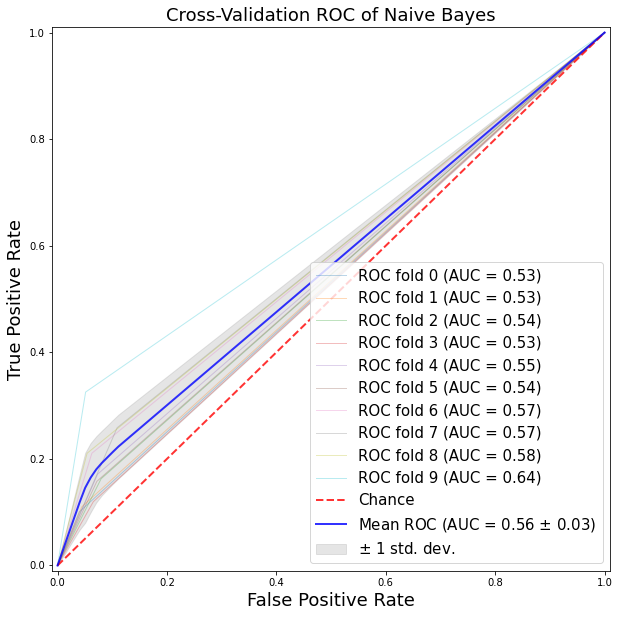

Average Accuracy: 0.898651996768567
Average Precision: 0.12697768927162698
Average Recall: 0.18269309637730688
Average F1 score: 0.14754665566866343


In [140]:

cv = StratifiedKFold(n_splits=10)

classifier = Naive_Bayes_CV()

tprs = []
aucs = []
accu=[]
prec=[]
recl=[]
f1sc=[]
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0

#Passing the Dataset
for train_index, test_index  in cv.split(X_norm, y_PCA_df.values):
    x_train_fold, x_test_fold = X_norm[train_index], X_norm[test_index]
    y_train_fold, y_test_fold = y_df.values[train_index], y_df.values[test_index]
    oversample = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.8)
    x_train_fold, y_train_fold = oversample.fit_resample(x_train_fold, y_train_fold)    
    classifier.fit(x_train_fold, y_train_fold)
    c_pred= classifier.predict(x_test_fold)
    accu.append(accuracy_score(y_test_fold,c_pred))
    prec.append(sklearn.metrics.precision_score(y_test_fold,c_pred))
    recl.append(sklearn.metrics.recall_score(y_test_fold,c_pred))
    f1sc.append(sklearn.metrics.f1_score(y_test_fold,c_pred))
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test_fold, c_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Naive Bayes',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()
avg_acc=0
avg_prec=0
avg_recl=0
avg_f1sc=0
for i,m,n,a in zip(accu,prec,recl,f1sc):
  avg_acc+=i
  avg_prec+=m
  avg_recl+=n
  avg_f1sc+=a

#Printing the Evaluating Fields
print('Average Accuracy:',avg_acc/10)
print('Average Precision:',avg_prec/10)
print('Average Recall:',avg_recl/10)
print('Average F1 score:',avg_f1sc/10)

**Cross Checking/ Comparing with model created using SkLearn Package**

***Logistic Regression***

***With Correlation based dimension reduction Dataset***

In [141]:
#Importing the Required Libraries
from sklearn.linear_model import LogisticRegression

In [142]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)

In [143]:
#Fitting the Model
logreg = LogisticRegression(max_iter=5000)
l=logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [144]:
#logistic Regression
l_pred=l.predict(x_test)
print('Accuracy:',accuracy_score(y_test,l_pred))
print("Recall score : ", recall_score(y_test, l_pred))
print("Precision score : ",precision_score(y_test, l_pred ))
print("F1 score : ",f1_score(y_test, l_pred))

Accuracy: 0.9506988173859622
Recall score :  0.011075949367088608
Precision score :  0.2916666666666667
F1 score :  0.021341463414634144


***With PCA based dimension reduction Dataset***

In [145]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_PCA_df, y_PCA_df, test_size = 0.3, random_state = 0)

In [146]:
#Fitting the Model
logreg = LogisticRegression(max_iter=5000)
l=logreg.fit(x_train,y_train)

In [147]:
#logistic Regression
l_pred=l.predict(x_test)
print('Accuracy:',accuracy_score(y_test,l_pred))
print("Recall score : ", recall_score(y_test, l_pred))
print("Precision score : ",precision_score(y_test, l_pred ))
print("F1 score : ",f1_score(y_test, l_pred))

Accuracy: 0.9507756105052987
Recall score :  0.007911392405063292
Precision score :  0.2631578947368421
F1 score :  0.015360983102918589


Naive_Bayes

***With Correlation based dimension reduction Dataset***

In [148]:
#Importing Required Libraries
from sklearn.naive_bayes import GaussianNB

In [149]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)

In [150]:
#Fitting the Model
gb = GaussianNB()
gb.fit(x_train, y_train)

GaussianNB()

In [151]:
#Naive Bayes
print("Naive Bayes score: ",gb.score(x_test, y_test))
y_pred=gb.predict(x_test)
print("F1 score:", sklearn.metrics.f1_score(y_test, y_pred))
print("Precision:", sklearn.metrics.precision_score(y_test, y_pred))
print("Recall:", sklearn.metrics.recall_score(y_test, y_pred))

Naive Bayes score:  0.9062356012901244
F1 score: 0.0935412026726058
Precision: 0.08811188811188811
Recall: 0.09968354430379747


With PCA based dimension reduction Dataset

In [152]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_PCA_df, y_PCA_df, test_size = 0.3, random_state = 0)

In [153]:
#Fitting the Model
gb = GaussianNB()
gb.fit(x_train, y_train)

GaussianNB()

In [154]:
#Naive Bayes
print("Naive Bayes score: ",gb.score(x_test, y_test))
y_pred=gb.predict(x_test)
print("F1 score:", sklearn.metrics.f1_score(y_test, y_pred))
print("Precision:", sklearn.metrics.precision_score(y_test, y_pred))
print("Recall:", sklearn.metrics.recall_score(y_test, y_pred))

Naive Bayes score:  0.922669328828137
F1 score: 0.08371246587807096
Precision: 0.09850107066381156
Recall: 0.07278481012658228
